# **Customer Service Requests Analysis**#

In [1]:
#importing required Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

### **Task_1: - Import a 311 NYC service request.** ###

In [4]:
input_file = pd.read_csv("C:/Users/Nithin K/Desktop/Class_materials/311_Service_Requests_from_2010_to_Present.csv",low_memory = False)

In [5]:
input_file.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [6]:
input_file.tail(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [7]:
input_file.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
input_file.shape

(300698, 53)

In [9]:
input_file.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [10]:
# Important column "Closed_date" has many missing values
input_file[input_file['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
### **Task_2 : - Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.** ###

In [11]:
import datetime as dt
import time, datetime

In [12]:
#converting 'Created date' and 'Closed date' to datetime types
input_file['Created Date'] = pd.to_datetime(input_file['Created Date'])
input_file['Closed Date'] = pd.to_datetime(input_file['Closed Date'])
input_file['Created Date'].dtype
input_file['Created Date'].dtype

dtype('<M8[ns]')

In [13]:
# Creating a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.
input_file['Request_Closing_Time'] = input_file['Closed Date'] - input_file['Created Date']
input_file['Request_Closing_Time'].head(5)

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

***
### **Task:-3 Provide 4 major insights/patterns** 

#### **1. Basic insights from the data would be to have a visual about the most recorded complaints** ####

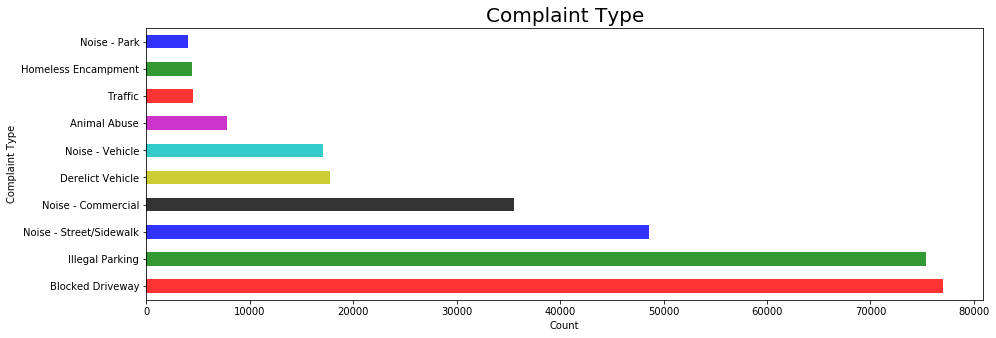

In [14]:
input_file['Complaint Type'].value_counts().head(10).plot(kind='barh',color=list('rgbkycm'),alpha = 0.8,figsize=(15,5));
plt.title('Complaint Type',fontsize=20)
plt.xlabel('Count')
plt.ylabel('Complaint Type')
plt.show()

#### **2.Insights about the status of the complaints** ####

In [15]:
input_file['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

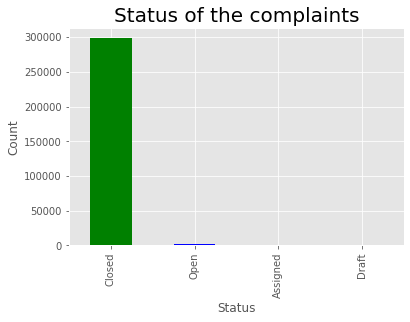

In [16]:
style.use('ggplot')
input_file['Status'].value_counts().plot(kind='bar', color=list('gbkymc'))
plt.title('Status of the complaints',fontsize=20)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#### **3.Analysis to see which month has the most complaints recorded.** 

In [17]:
# Creating a new column of the months when the complaint was recorded
Months_in_list = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
# Creating a function to pull the data of 'Created date'
def month(Created_Date):
    new = str(Created_Date)
    date_pull = datetime.datetime.strptime(new, "%Y-%m-%d %H:%M:%S")
    return Months_in_list[date_pull.month]
input_file['Created_Month'] = input_file['Created Date'].apply(month)
input_file.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,Dec


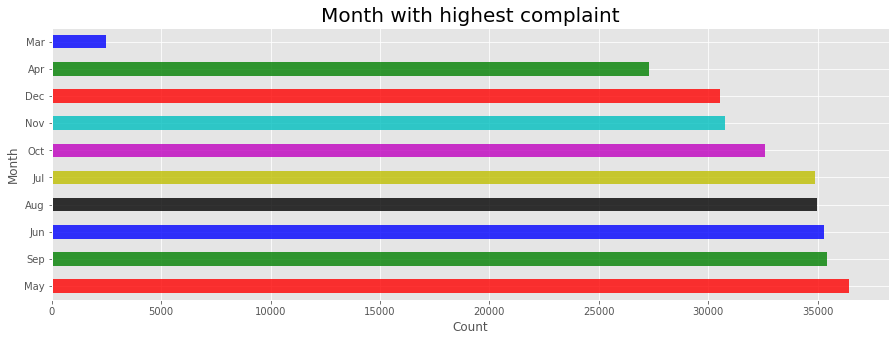

In [18]:
input_file['Created_Month'].value_counts()
input_file['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.8, figsize=(15,5))
plt.title('Month with highest complaint',fontsize=20)
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()


#### **4.Visualising the complaints based on a particular city**

In [19]:
Data_frame_of_city_vs_complaint_type = pd.crosstab(index=input_file["City"], columns=input_file["Complaint Type"])
Data_frame_of_city_vs_complaint_type

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0


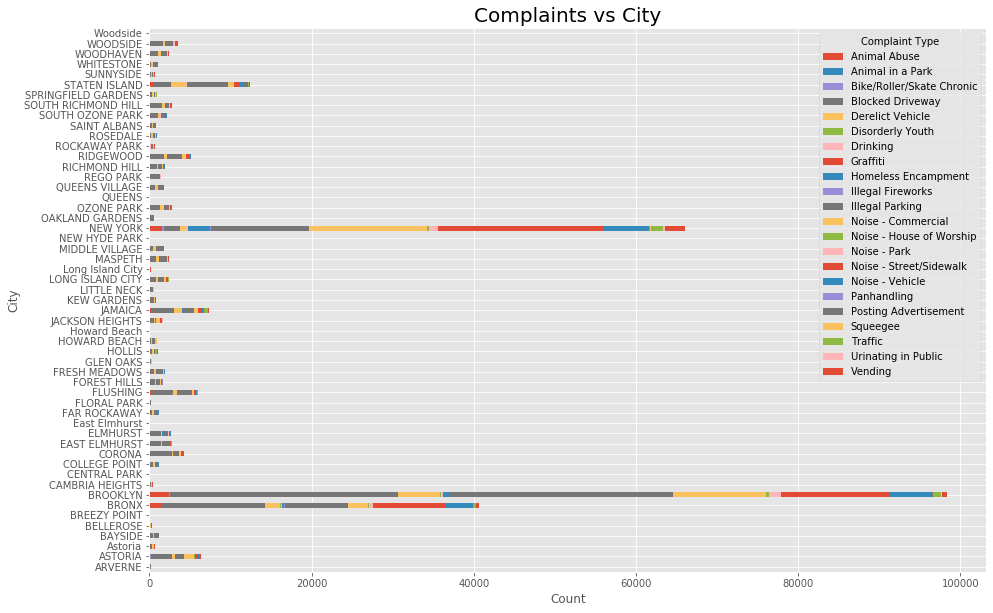

In [20]:
Data_frame_of_city_vs_complaint_type.plot(kind="barh", figsize=(15,10),stacked=True)
plt.title('Complaints vs City',fontsize=20)
plt.xlabel('Count')
plt.show()
# From the graph we can conclude that Brooklyn has the highest no.of complaints followed by Newyork

***
### **Task 4: - Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.**

#### **Convert the "Request_Closing_Time" from Hour-Min-Sec to  Hours**

In [21]:
#Function to convert the time
def toHour(time):
    days = time.days
    hours = round(time.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [22]:
input_file['Request_Closing_Time_In_Hr'] = input_file['Request_Closing_Time'].apply(toHour)
input_file['Request_Closing_Time_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_Time_In_Hr, dtype: float64

In [24]:
#Finding the null values in the 'City' column and replacing them with 'N/A'
input_file['City'].isnull().sum()
input_file['City'].fillna('N/A',inplace = True)

In [25]:
# Grouping the 'Request_closing Time' based on the city and complaint type
input_file_grouped_by = input_file.groupby(['City','Complaint Type']).agg({'Request_Closing_Time_In_Hr':'mean'})
input_file_grouped_by

Request_Closing_Time_In_Hr
City     Complaint Type                                     
ARVERNE  Animal Abuse                               2.153158
         Blocked Driveway                           2.526000
         Derelict Vehicle                           2.968889
         Disorderly Youth                           3.595000
         Drinking                                   0.240000
...                                                      ...
Woodside Blocked Driveway                           6.405455
         Derelict Vehicle                           4.965000
         Illegal Parking                            5.219500
         Noise - Commercial                         2.390000
         Noise - Street/Sidewalk                    3.410000

[782 rows x 1 columns]

*** 
### **Task 5: - Perform a statistical test for the following:**
                1. Whether the average response time across complaint types is similar or not (overall)?
                2. Are the type of complaint or service requested and location related?

#### **Question 1: - Using Annova test**
                H0 (Null Hypothesis) = Average response time across complaint types is similar.
                H1 (Alternate Hypothesis) = Average response time across complaint types is not similar.

In [26]:
#importing required Libraries
import scipy.stats as stats
from math import sqrt

In [29]:
# Complaint types which occur the most
Most_recorded_complaints = input_file['Complaint Type'].value_counts()[:5]
Most_recorded_complaints

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [33]:
#Indexing the complaints and Request_Closing Time in Hr
Most_recorded_complaints_index = Most_recorded_complaints.index
sample_data = input_file.loc[input_file['Complaint Type'].isin(Most_recorded_complaints_index), ['Complaint Type', 'Request_Closing_Time_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_Time_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [34]:
#Removing the null values from the sample data. 
sample_data.isnull().sum()
sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()

Complaint Type                0
Request_Closing_Time_In_Hr    0
dtype: int64

In [36]:
Test_1 = sample_data[sample_data['Complaint Type'] == Most_recorded_complaints_index[0]].Request_Closing_Time_In_Hr
Test_1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_Time_In_Hr, dtype: float64

In [37]:
Test_2 = sample_data[sample_data['Complaint Type'] == Most_recorded_complaints_index[1]].Request_Closing_Time_In_Hr
Test_2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_Time_In_Hr, dtype: float64

In [38]:
Test_3 = sample_data[sample_data['Complaint Type'] == Most_recorded_complaints_index[2]].Request_Closing_Time_In_Hr
Test_3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_Time_In_Hr, dtype: float64

In [39]:
Test_4 = sample_data[sample_data['Complaint Type'] == Most_recorded_complaints_index[3]].Request_Closing_Time_In_Hr
Test_4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_Time_In_Hr, dtype: float64

In [40]:
Test_5 = sample_data[sample_data['Complaint Type'] == Most_recorded_complaints_index[4]].Request_Closing_Time_In_Hr
Test_5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_Time_In_Hr, dtype: float64

In [41]:
stats.f_oneway(Test_1, Test_2, Test_3, Test_4, Test_5)

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

### **Since the P-value is less than 0.05, we reject the null-hypothesis**
***

#### **Question 2: - Using Chi-square test**
                H0 (Null Hypothesis) = Complain Type and Location is independent .
                H1 (Alternate Hypothesis) = Complain Type and Location is dependent.

In [42]:
# Cities with more number of complaints
City_with_more_complaints = input_file['City'].value_counts()[:5]
City_with_more_complaints_with_index = City_with_more_complaints.index

In [43]:
sample_data_location = input_file.loc[(input_file['Complaint Type'].isin(Most_recorded_complaints_index)) & (input_file['City'].isin(City_with_more_complaints_with_index)), ['Complaint Type', 'City']]
sample_data_location.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [44]:
pd.crosstab(sample_data_location['Complaint Type'], sample_data_location['City'], margins=True)

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
All,33893,85610,5961,49720,10291,185475


In [45]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location['Complaint Type'], sample_data_location['City']))
print(ch2)
print(p_value)

40522.79928349593
0.0


### **Since the P-value is less than 0.05, we reject the null-hypothesis**
***